# Business Problem:
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

# Questions -

1. What type of content is available in different countries?
2. How has the number of movies released per year changed over the last 20-30 years?
3. Comparison of tv shows vs. movies.
4. What is the best time to launch a TV show?
5. Analysis of actors/directors of different types of shows/movies.
6. Does Netflix has more focus on TV Shows than movies in recent years
7. Understanding what content is available in different countries

# Data Description -
Data contains all the movie and TV shows added to the netflix database from 2008 onwards till 2021. These movies & TV shows were relased 1925 onwards till 2021. Some of the columns has missing information or has multiple names, genres listed, so data cleaning is mandatory.

# Existing data details and Summary
- number of Rows - 8807
- number of Columns - 12
- based on release dates, data ranges from 1925 - 2021 which was added in the netflix database 01/01/2008 - 09/25/2021.
- Columns list - ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', >> 'duration', number of 'listed_in', 'description']
- Nuls present in -
    Column Name     Count    Percentage
    director        2634     29.908028
    cast             825     9.367549
    country          831     9.435676
    date_added        10     0.113546
    rating             4     0.045418
    duration           3     0.034064
- number of TV shows - 2676
- number of Movies - 6131

# Approach -
- Reviwing the data received
- Cleaning data to remove / replacing Nuls
- Analysing Movie and TV shows separately and compare the both to get the final conclusion
- Growing trend
- Whether to make Movies or TV shows
- Which is preferred genre and which types of genres need to be avoided
- which casts can be used

# Assumptions -
Since there are no indicators to measure the popularity, certain assumptions are made to understand the overall trend eg. - total number of TV shows / movies realeased every year and then when it was added to the netflix.

# Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
(df.isnull().sum()) / (df.shape[0])*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# Data Cleaning - removing / replacing nuls


In [ ]:
# Since the percentage of nulls are in negligible percentage, it won't affect the analysis if gets dropped, hence dropping these rows

df.dropna(subset = ["date_added", "rating", "duration" ], axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6169 non-null   object
 4   cast          7965 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
# While reviwing director column,below points are considered -
    # It's been observed that 29.908028 percentage of director names are missing, which is really high percent, so we can not drop it.
    # There are multiple directors for a movie or a tv show, so we can not replace it with any single director name directly.
# hence keeping these rows and replacing missing values with "No director listed" string for analysis.

df['director'].fillna("No director listed", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          7965 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
# While reviwing cast column,below points are considered -
    # It's been observed that 9.367549 percentage of cast names are missing, which is really high percent, so we can not drop it.
    # There are multiple casted in a movie or a tv show, so we can not replace it with any single person name directly.
# hence keeping these rows and replacing missing values with "No cast listed" string for analysis.

df['cast'].fillna("No cast listed", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
# While reviwing country column,below points are considered -
    # It's been observed that 9.435676 percentage of country names are missing, which is really high percent, so we can not drop it.
    # There are multiple countries where a movie or a tv show originated from, so we can not replace it with any single country name directly.
# hence keeping these rows and replacing missing values with "Unknown" string for analysis.

df['country'].fillna("Unknown", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [ ]:
df.shape

(8790, 12)

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["added_year"] = df["date_added"].dt.year
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,No director listed,No cast listed,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019


In [ ]:
df["release_year"].value_counts()

2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df["release_year"].min(),df["release_year"].max()

(1925, 2021)

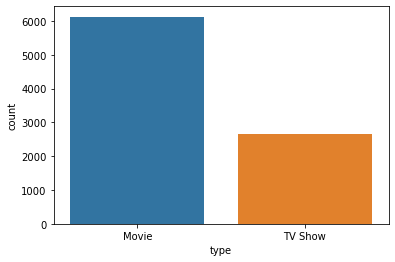

In [ ]:
sns.countplot(x = df["type"])
plt.show()

In [ ]:
movies = df[df["type"] == "Movie"]
movies["type"].value_counts()

Movie    6126
Name: type, dtype: int64

In [ ]:
movies.shape

(6126, 13)

In [ ]:
shows = df[df["type"] == "TV Show"]
shows["type"].value_counts()

TV Show    2664
Name: type, dtype: int64

In [ ]:
shows.shape

(2664, 13)

# 1.	What type of content is available in different countries?

All movies & shows where country is unknown have not been considered in this analysis.

In [ ]:
countries = df[df["country"]!= "Unknown"].set_index(['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'added_year'])["country"].str.split(",", expand = True).stack().reset_index(drop = False).reset_index()
countries.rename(columns = {0 : "country"}, inplace = True)
countries.head()

,index,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,added_year,level_12,country
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast listed,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,0,United States
1,1,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,0,South Africa
2,2,s5,TV Show,Kota Factory,No director listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,0,India
3,3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,0,United States
4,4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,1,Ghana


In [ ]:
countries["country"].value_counts().head(10)

United States     3202
India             1008
United Kingdom     627
 United States     479
Canada             271
Japan              257
France             212
South Korea        211
 France            181
Spain              181
Name: country, dtype: int64

In [ ]:
# Only selecting top 30 content producers per country - movies & TV shows

content = pd.DataFrame(countries[["country","type"]].value_counts().head(30)).reset_index()
content.rename(columns = {0 : "total number"}, inplace = True)
content.head()

,country,type,total number
0,United States,Movie,2361
1,India,Movie,927
2,United States,TV Show,841
3,United States,Movie,388
4,United Kingdom,Movie,382


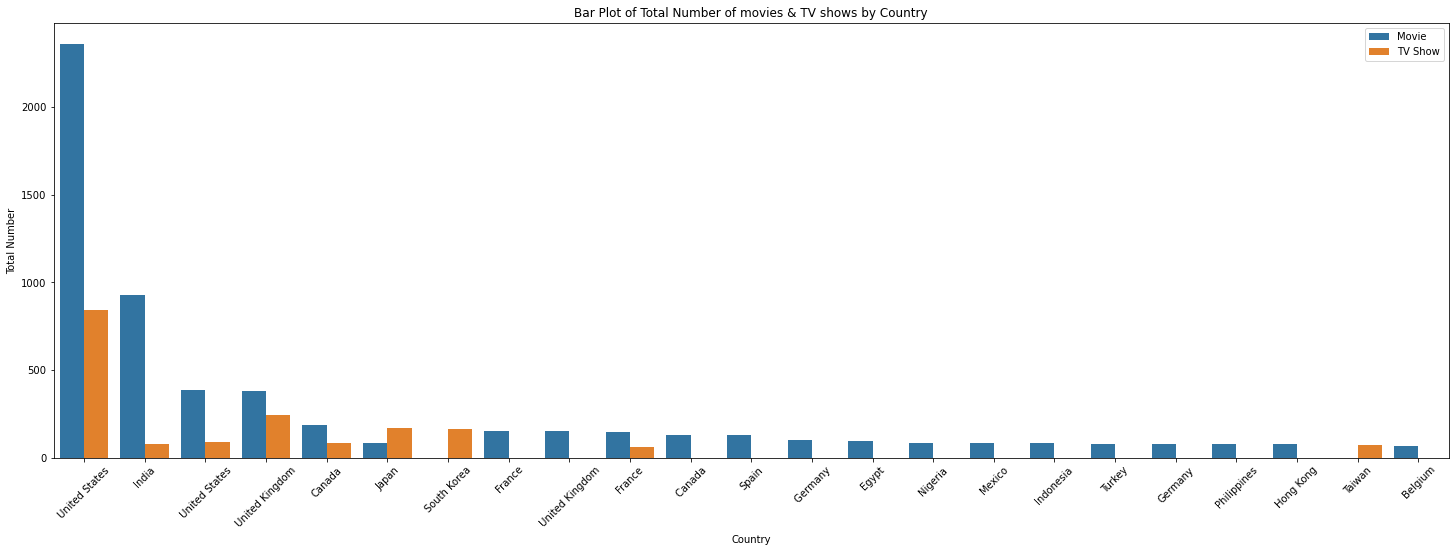

In [ ]:
plt.figure(figsize=(25, 8))

sns.barplot(data=content, x="country", y="total number", hue="type")


plt.title("Bar Plot of Total Number of movies & TV shows by Country")
plt.xlabel("Country")
plt.ylabel("Total Number")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.show()

United States, India, United States, United Kingdom, Canada, South Korea have huge number of TV shows / movies getting released every year, which shows there is possibility of increasing business

In [ ]:
countries[["country","rating"]].value_counts()

country        rating
United States  TV-MA     985
India          TV-14     563
United States  R         536
               TV-14     437
               PG-13     362
                        ... 
 Senegal       TV-MA       1
               TV-14       1
 Saudi Arabia  TV-PG       1
               TV-MA       1
Zimbabwe       TV-G        1
Length: 768, dtype: int64

In [ ]:
movie_rating = countries[countries["type"] == "Movie"][["country","rating"]].value_counts()
movie_rating

country        rating
United States  TV-MA     645
India          TV-14     539
United States  R         536
               PG-13     362
               TV-14     231
                        ... 
Greece         TV-MA       1
 New Zealand   NR          1
Germany        TV-Y7       1
               TV-Y        1
Zimbabwe       TV-G        1
Length: 701, dtype: int64

In [ ]:
shows_rating = countries[countries["type"] == "TV Show"][["country","rating"]].value_counts()
shows_rating

country         rating
United States   TV-MA     340
                TV-14     206
                TV-PG     111
United Kingdom  TV-MA     105
United States   TV-Y7      81
                         ... 
Argentina       TV-PG       1
Australia       TV-Y7       1
Austria         TV-MA       1
Belarus         TV-Y        1
Uruguay         TV-G        1
Length: 272, dtype: int64

TV-MA, TV-PG rated content which is for the Mature Audiences, is available in the database in large number independent of the country and type of content(movie or tv show).

# 2.	How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
movies_last_30_years = movies[(movies["release_year"] > 1990)]
movies_last_30_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021


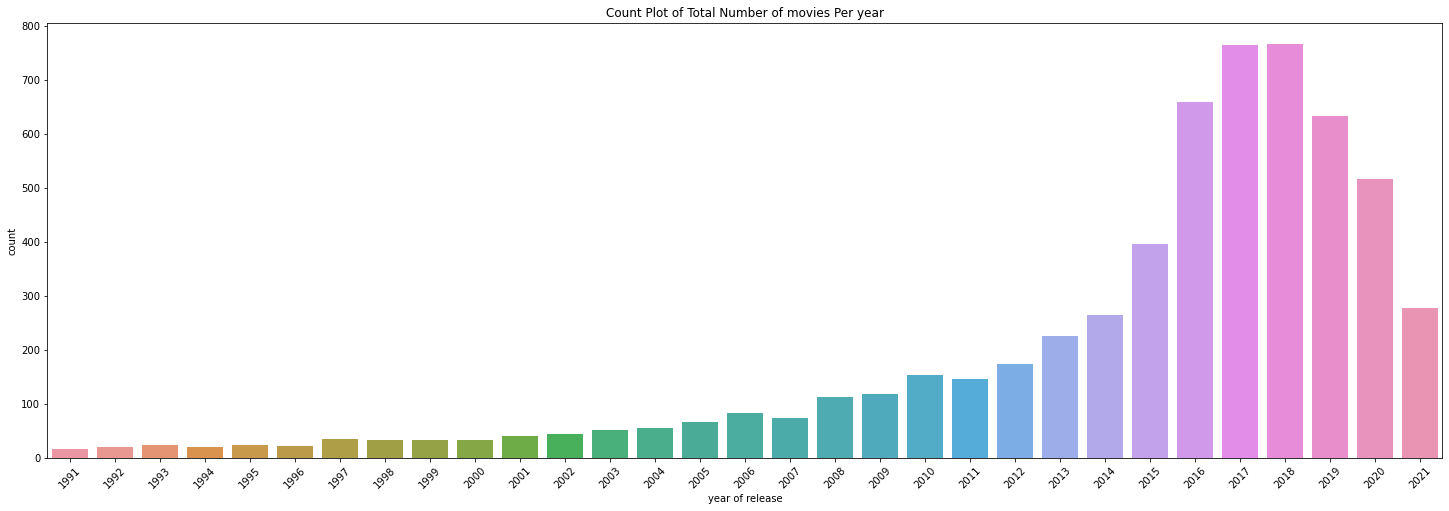

In [ ]:
plt.figure(figsize=(25, 8))

sns.countplot(data = movies_last_30_years, x = "release_year")
plt.title("Count Plot of Total Number of movies Per year")
plt.xlabel("year of release")
plt.xticks(rotation=45)
plt.show()

Genre based analysis is given Q7.

# 3.	Comparison of tv shows vs. movies.

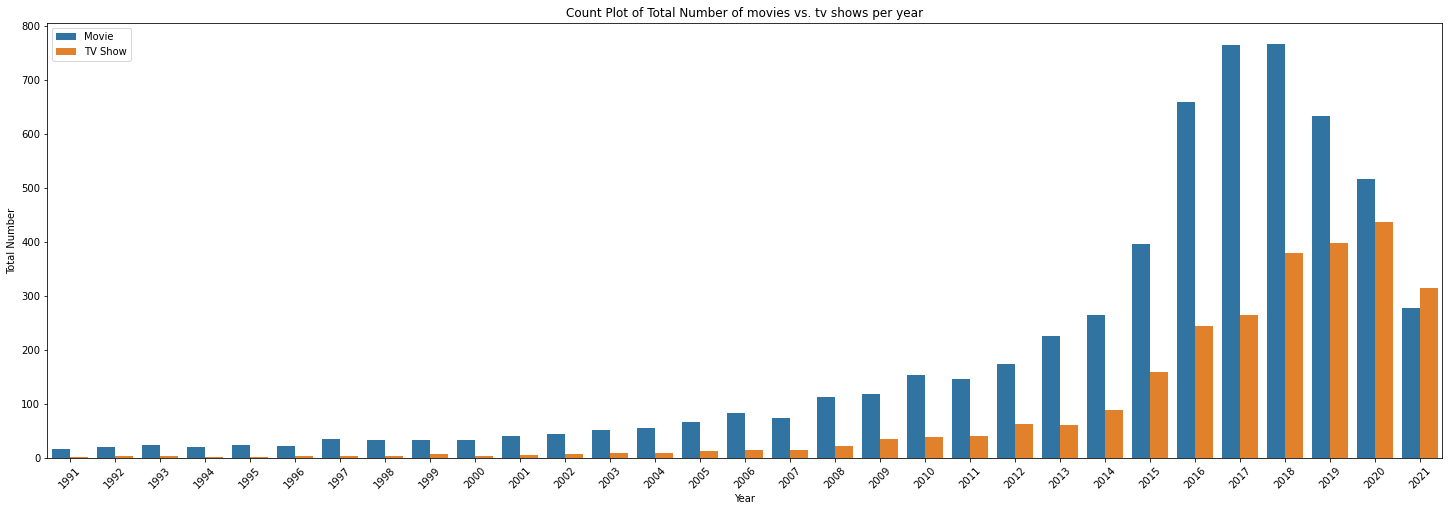

In [ ]:
plt.figure(figsize=(25, 8))

sns.countplot(data = df[df["release_year"] > 1990], x = "release_year", hue = "type")
plt.title("Count Plot of Total Number of movies vs. tv shows per year")
plt.xlabel("Year")
plt.ylabel("Total Number")
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()



In [ ]:
genre = df[df["listed_in"] != 0].set_index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description','added_year'])["listed_in"].str.split(",", expand = True).stack().reset_index(name = "genre", drop = False).reset_index()
genre["genre"].value_counts().head()
genre = genre[[ 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'added_year', 'genre']]

genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_year,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast listed,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,Documentaries
1,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,International TV Shows
2,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Dramas
3,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,Crime TV Shows


In [ ]:
genre["genre"].value_counts().head(10)

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: genre, dtype: int64

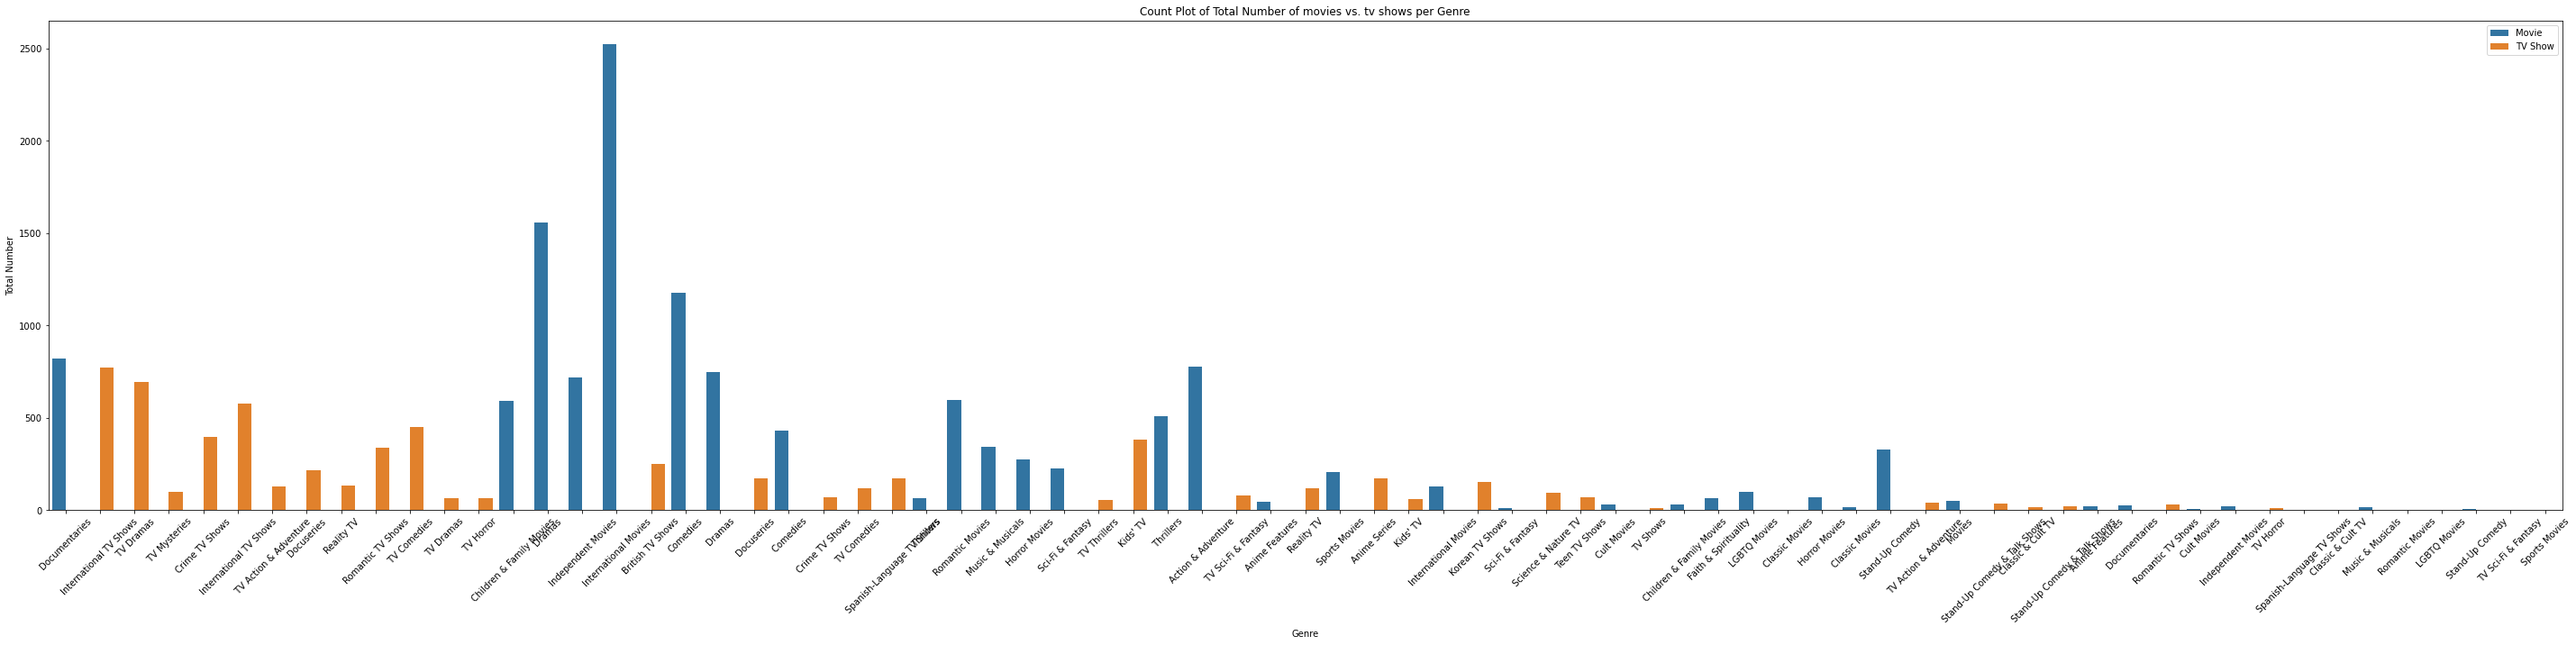

In [ ]:
plt.figure(figsize=(50, 10))

sns.countplot(data = genre[genre["release_year"] > 1990], x = "genre", hue = "type")
plt.title("Count Plot of Total Number of movies vs. tv shows per Genre")
plt.xlabel("Genre")
plt.ylabel("Total Number")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.show()

In [ ]:
top_5_countries_movies = countries[countries["type"]== "Movie"][["country"]].value_counts().head(5)
top_5_countries_movies

country       
United States     2361
India              927
 United States     388
United Kingdom     382
Canada             187
dtype: int64

In [ ]:
top_5_countries_tv_shows = countries[countries["type"]== "TV Show"][["country"]].value_counts().head(5)
top_5_countries_tv_shows

country       
United States     841
United Kingdom    245
Japan             172
South Korea       164
 United States     91
dtype: int64

# 4.	What is the best time to launch a TV show?

In [ ]:
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
1,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,No director listed,No cast listed,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,No director listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021


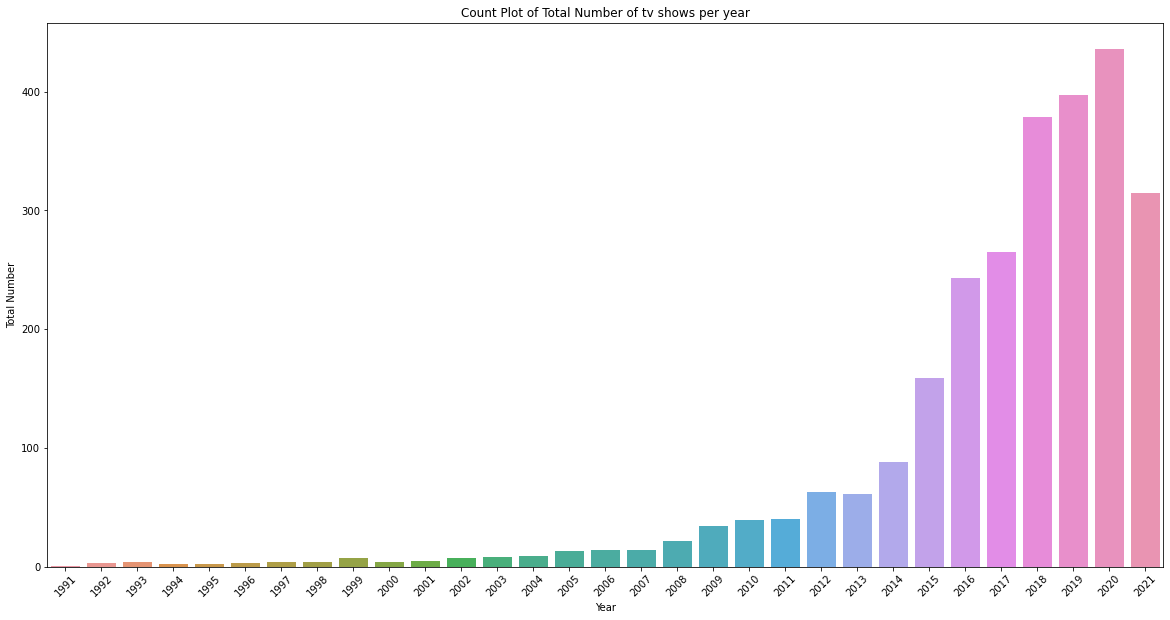

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(data = shows[shows["release_year"] > 1990], x = "release_year")
plt.title("Count Plot of Total Number of tv shows per year")
plt.xlabel("Year")
plt.ylabel("Total Number")
plt.xticks(rotation=45)

plt.show()

In [ ]:
df["date_added"].max() # It shows that the data is incomplete for the year 2021.

Timestamp('2021-09-25 00:00:00')

TV shows are increasing year by year as the trend suggests as it's gaining popularity. So current time is the best time to launch a TV show


# 5.	Analysis of actors/directors of different types of shows/movies.

In [ ]:
casts = df[df["cast"]!= 0].set_index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year'])["cast"].str.split(",", expand = True).stack().reset_index(name = "cast_name", drop = False).reset_index()
casts["cast_name"].value_counts().head()
casts = casts[['show_id', 'type', 'title', 'director', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'added_year', 'cast_name']]
casts.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,added_year,cast_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,No cast listed
1,s2,TV Show,Blood & Water,No director listed,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Ama Qamata
2,s2,TV Show,Blood & Water,No director listed,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Khosi Ngema
3,s2,TV Show,Blood & Water,No director listed,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Gail Mabalane
4,s2,TV Show,Blood & Water,No director listed,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Thabang Molaba


In [ ]:
casts["cast_name"].value_counts().head()

No cast listed       825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
Name: cast_name, dtype: int64

In [ ]:
directors = df[df["director"] != 0].set_index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year'])["director"].str.split(",", expand = True).stack().reset_index(name="director_name", drop = False).reset_index()
directors["director_name"].value_counts().head()
directors = directors[['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'director_name']]
directors.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,director_name
0,s1,Movie,Dick Johnson Is Dead,No cast listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,No director listed
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,No cast listed,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,No director listed
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,No director listed


In [ ]:
directors["director_name"].value_counts().head()

No director listed    2621
Rajiv Chilaka           22
Raúl Campos             18
 Jan Suter              18
Marcus Raboy            16
Name: director_name, dtype: int64

# 6.	Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:
df["added_year"].min()

2008

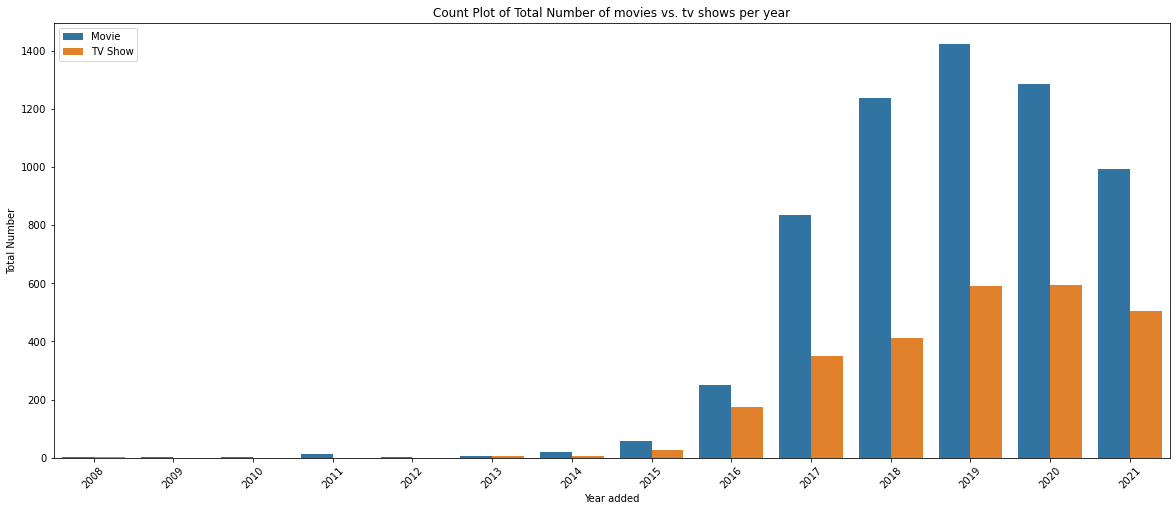

In [ ]:
plt.figure(figsize=(20, 8))

sns.countplot(data = df, x = "added_year", hue = "type")
plt.title("Count Plot of Total Number of movies vs. tv shows per year")
plt.xlabel("Year added")
plt.ylabel("Total Number")
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()


In [ ]:
grouped_df = df.groupby(["added_year", "type"]).size().reset_index(name="count").sort_values(by = "added_year", ascending = False)
grouped_df.head()

,added_year,type,count
23,2021,TV Show,505
22,2021,Movie,993
21,2020,TV Show,595
20,2020,Movie,1284
19,2019,TV Show,592


Trend shows that Netflix have started adding more TV shows which is in line with the increasing releases of the TV shows. We don’t have complete data for the 2021, but still, it’s comparatively on par with the 2020 TV shows. Hence, we can assume that by the end of the year, it close to 2020 total number of TV shows or even surpass it just like previous years. Increasing popularity of TV shows .

# 7. Understanding what content is available in different countries

In [ ]:
genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_year,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast listed,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,Documentaries
1,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,International TV Shows
2,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Dramas
3,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,Crime TV Shows


In [ ]:
countries_genre = genre[genre["country"]!= "Unknown"].set_index(['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'added_year', "genre"])["country"].str.split(",", expand = True).stack().reset_index(name = "country",drop = False).reset_index()
countries_genre = countries_genre[['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration', 'description', 'added_year',
       'genre', 'country']]
countries_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,added_year,genre,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast listed,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,Documentaries,United States
1,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,No director listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,TV Mysteries,South Africa
4,s5,TV Show,Kota Factory,No director listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,2021,International TV Shows,India


In [ ]:
grouped_genre = countries_genre.groupby(["country", "genre"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
grouped_genre.head(10)

,country,genre,count
1547,India,International Movies,807
2391,United States,Dramas,429
2389,United States,Documentaries,429
1575,India,Dramas,404
2386,United States,Comedies,374
2379,United States,Action & Adventure,323
2383,United States,Children & Family Movies,320
2354,United States,Independent Movies,318
1570,India,Comedies,267
2351,United States,Dramas,245


In [ ]:
countries[["country","rating"]].value_counts().head(10)

country         rating
United States   TV-MA     985
India           TV-14     563
United States   R         536
                TV-14     437
                PG-13     362
                TV-PG     272
India           TV-MA     260
United Kingdom  TV-MA     224
United States   PG        211
Spain           TV-MA     143
dtype: int64

In [ ]:
movie_rating = countries[countries["type"] == "Movie"][["country","rating"]].value_counts()
movie_rating

country        rating
United States  TV-MA     645
India          TV-14     539
United States  R         536
               PG-13     362
               TV-14     231
                        ... 
Greece         TV-MA       1
 New Zealand   NR          1
Germany        TV-Y7       1
               TV-Y        1
Zimbabwe       TV-G        1
Length: 701, dtype: int64

In [ ]:
shows_rating = countries[countries["type"] == "TV Show"][["country","rating"]].value_counts()
shows_rating

country         rating
United States   TV-MA     340
                TV-14     206
                TV-PG     111
United Kingdom  TV-MA     105
United States   TV-Y7      81
                         ... 
Argentina       TV-PG       1
Australia       TV-Y7       1
Austria         TV-MA       1
Belarus         TV-Y        1
Uruguay         TV-G        1
Length: 272, dtype: int64

TV-MA, TV-PG rated content which is for the Mature Audiences, is available in the database in large number independent of the country and type of content(movie or tv show).